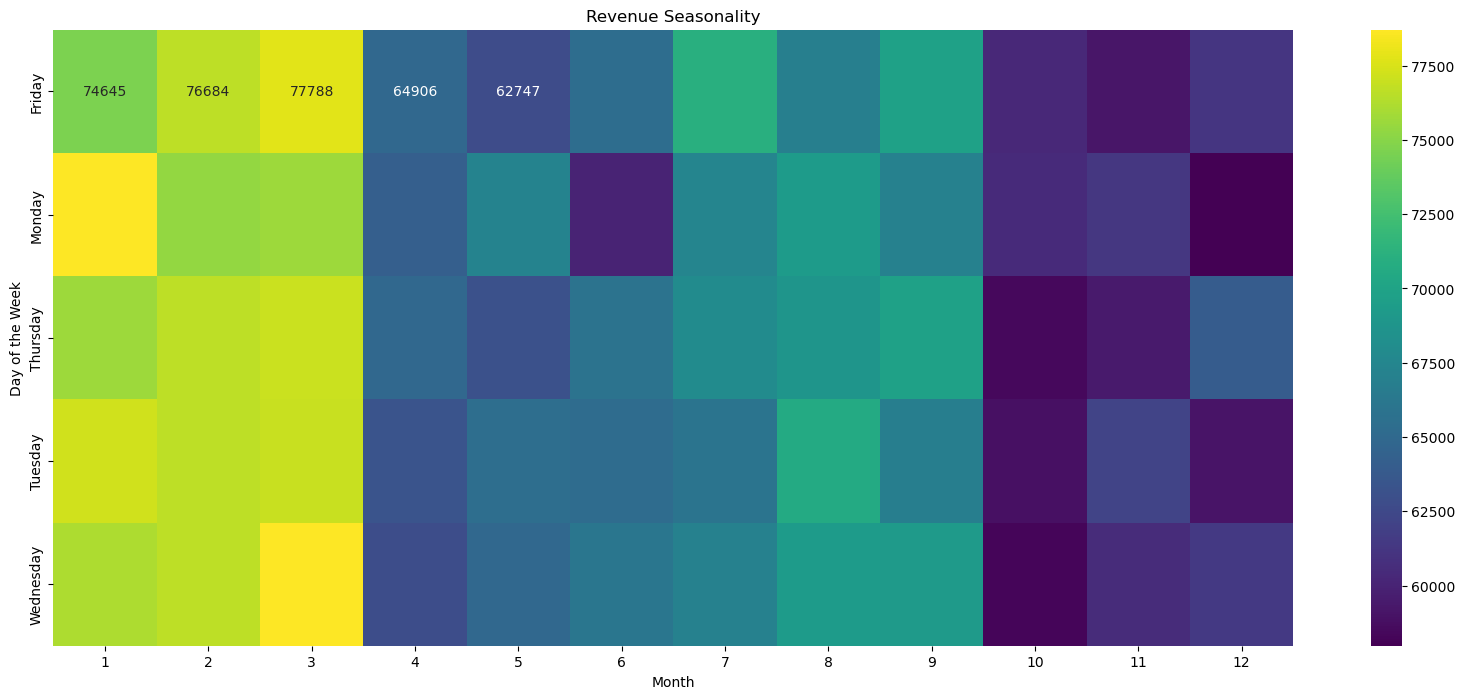

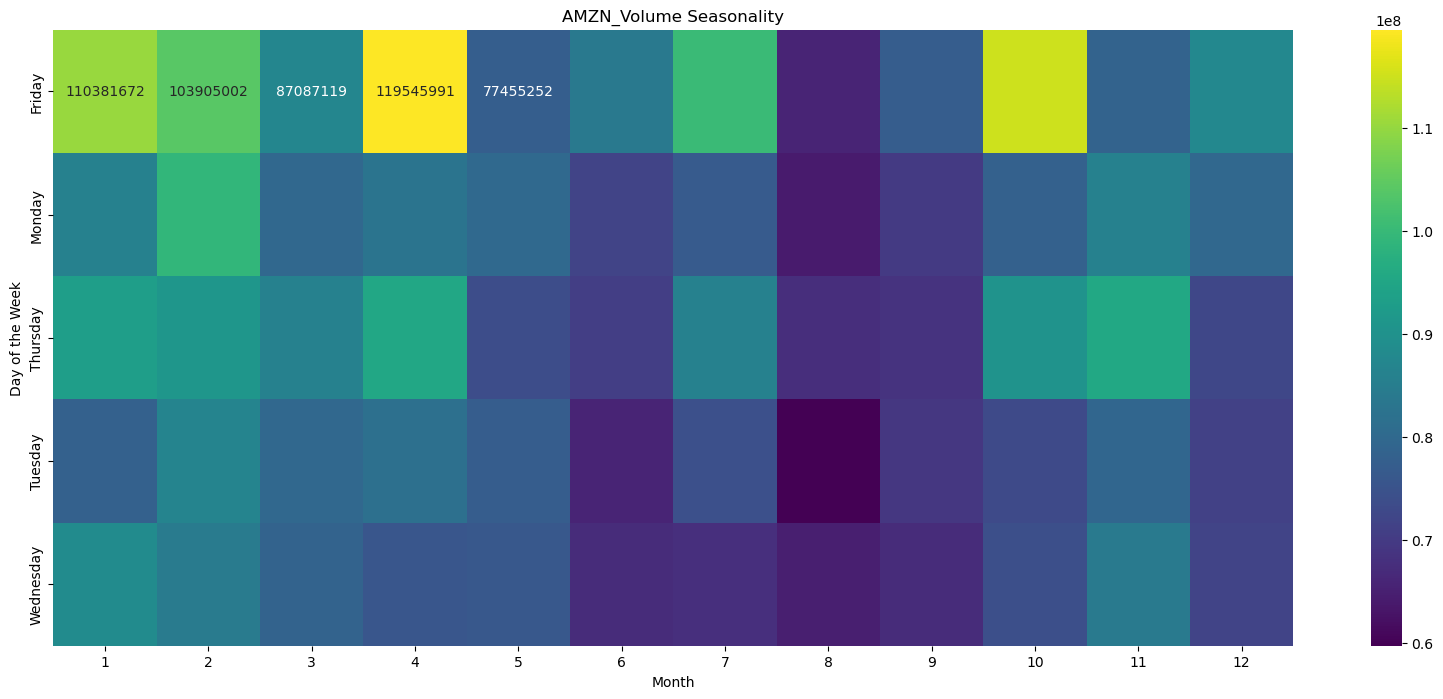

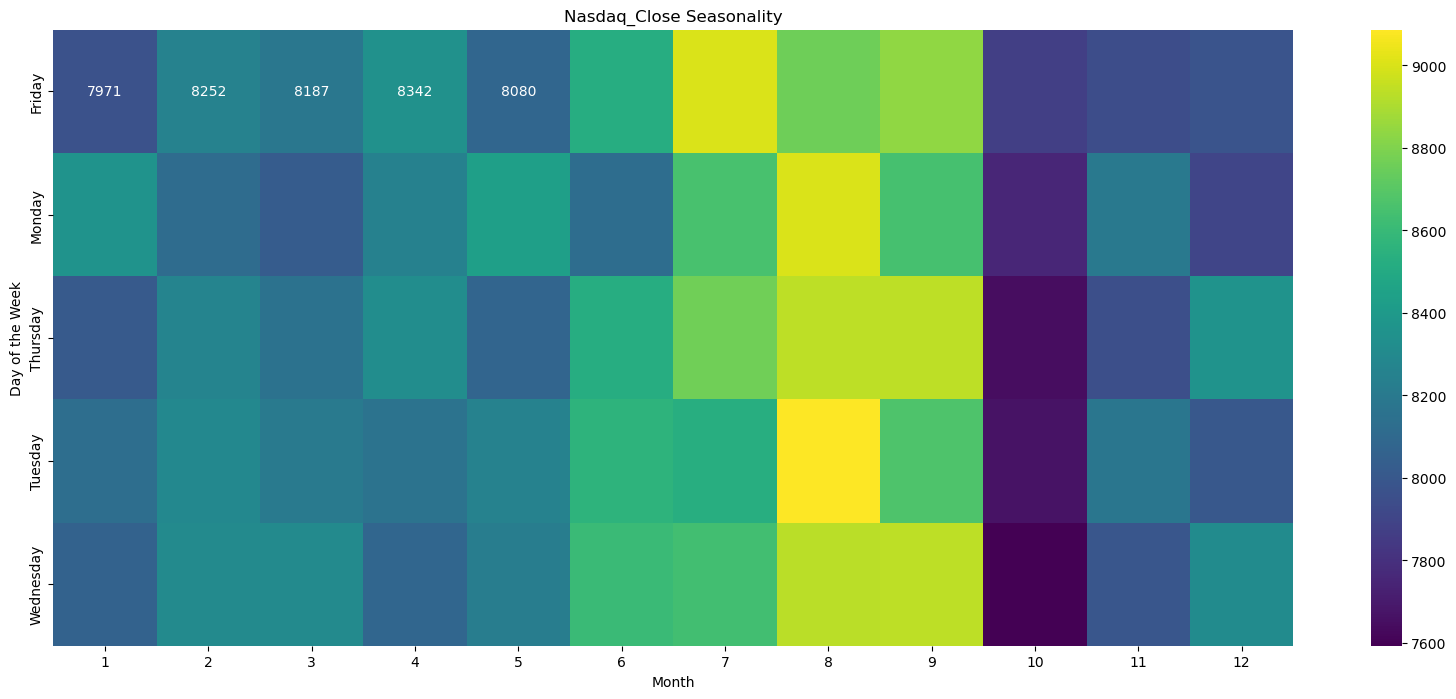

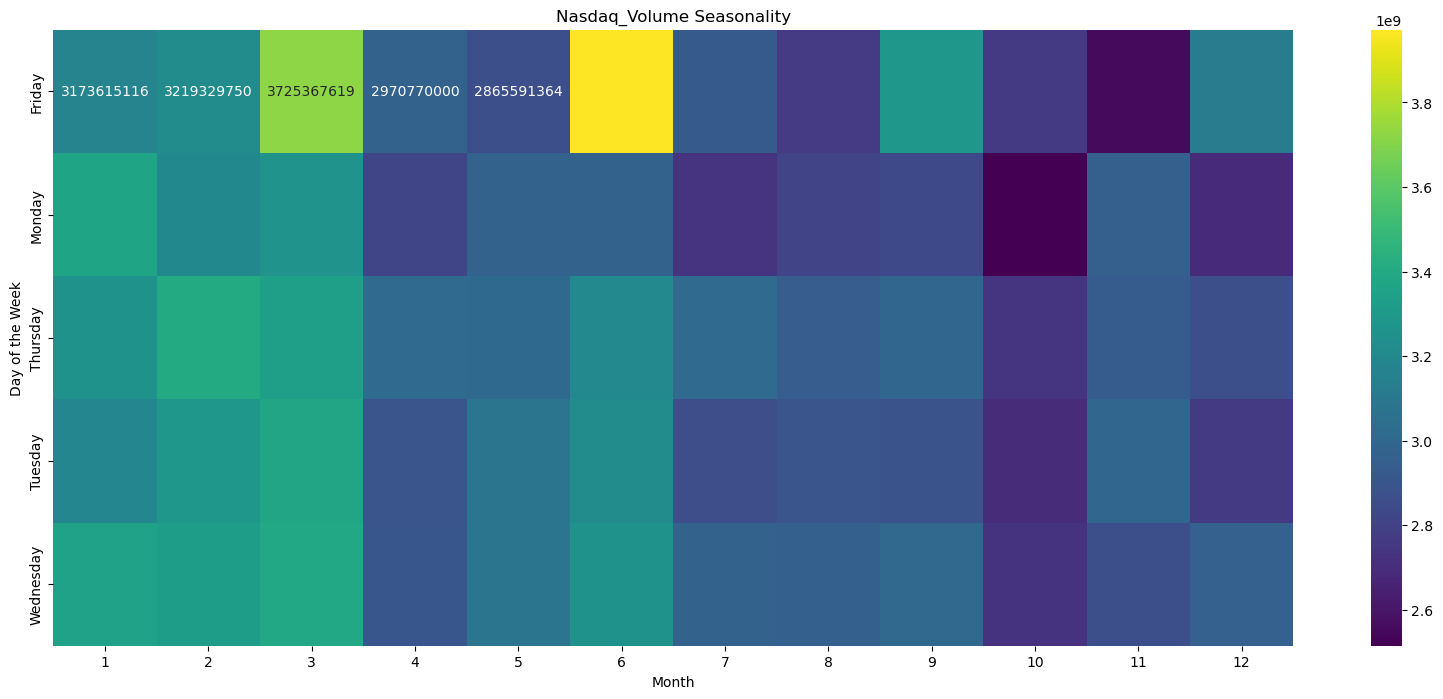

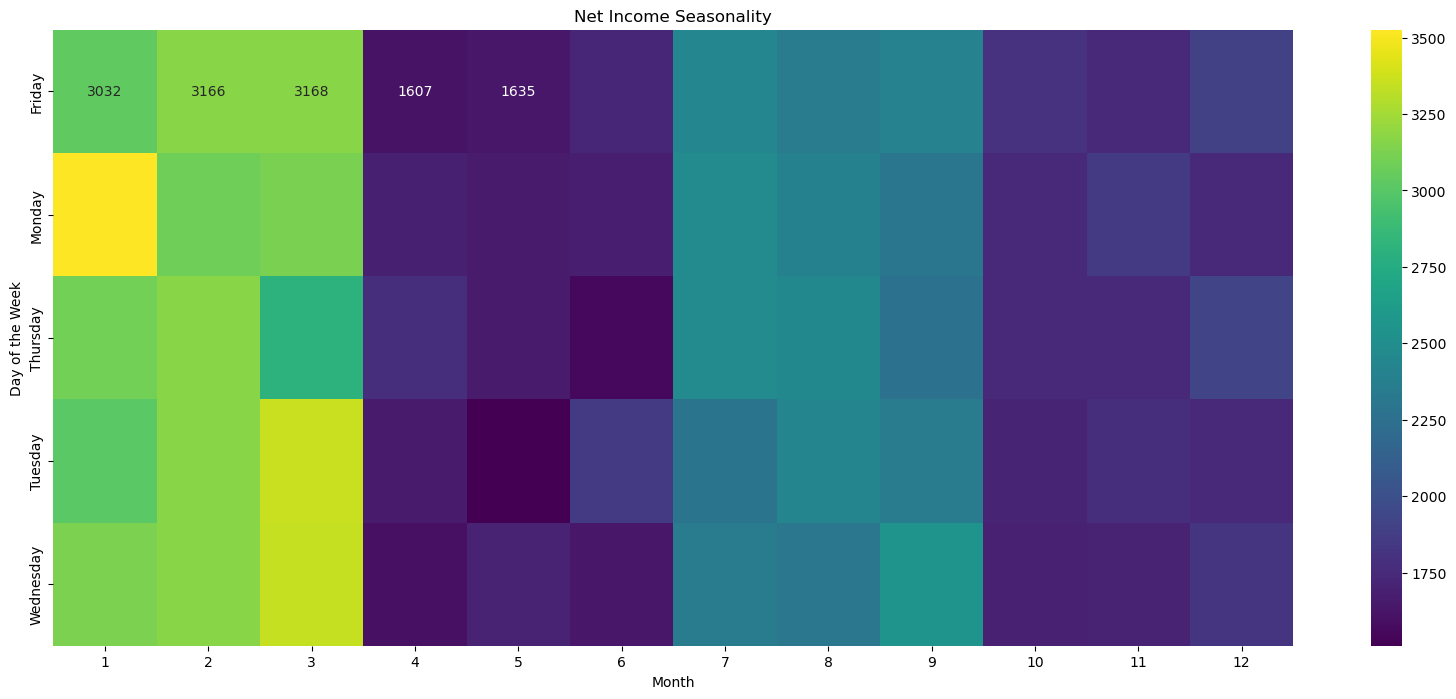

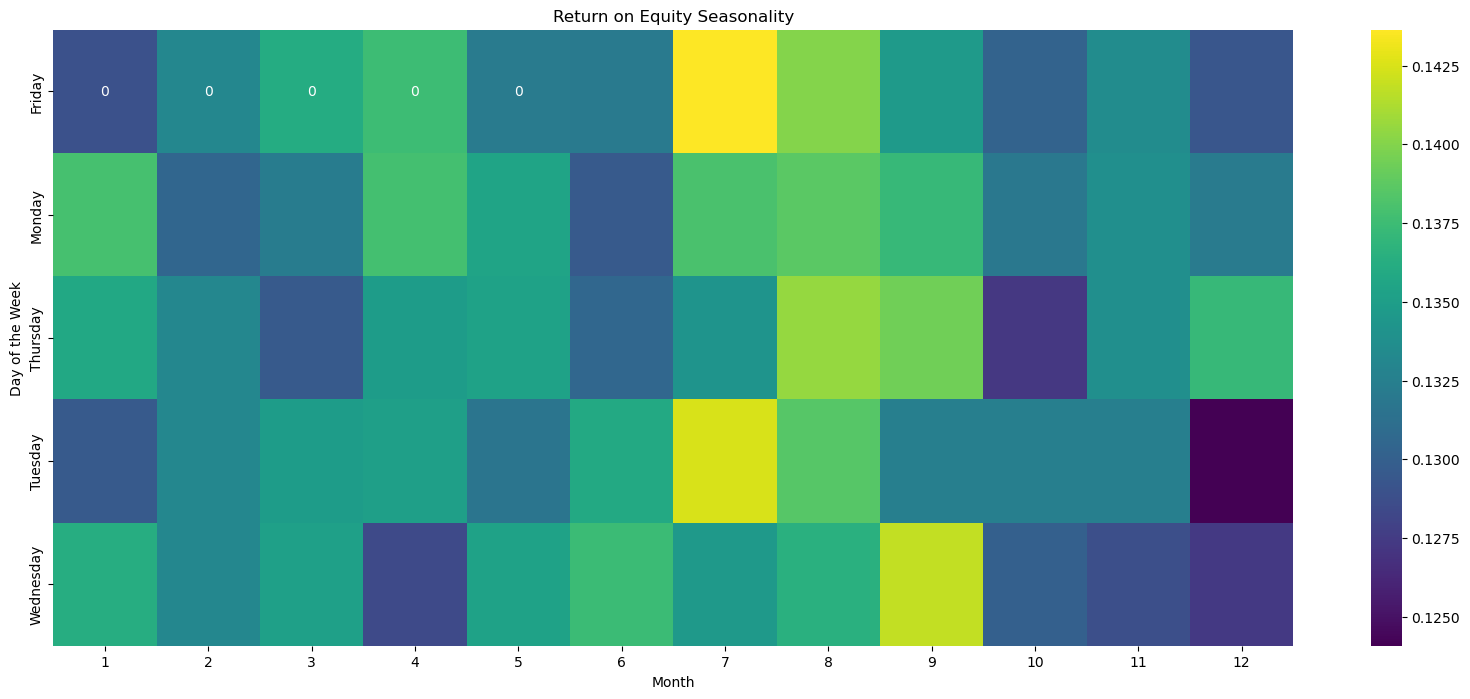

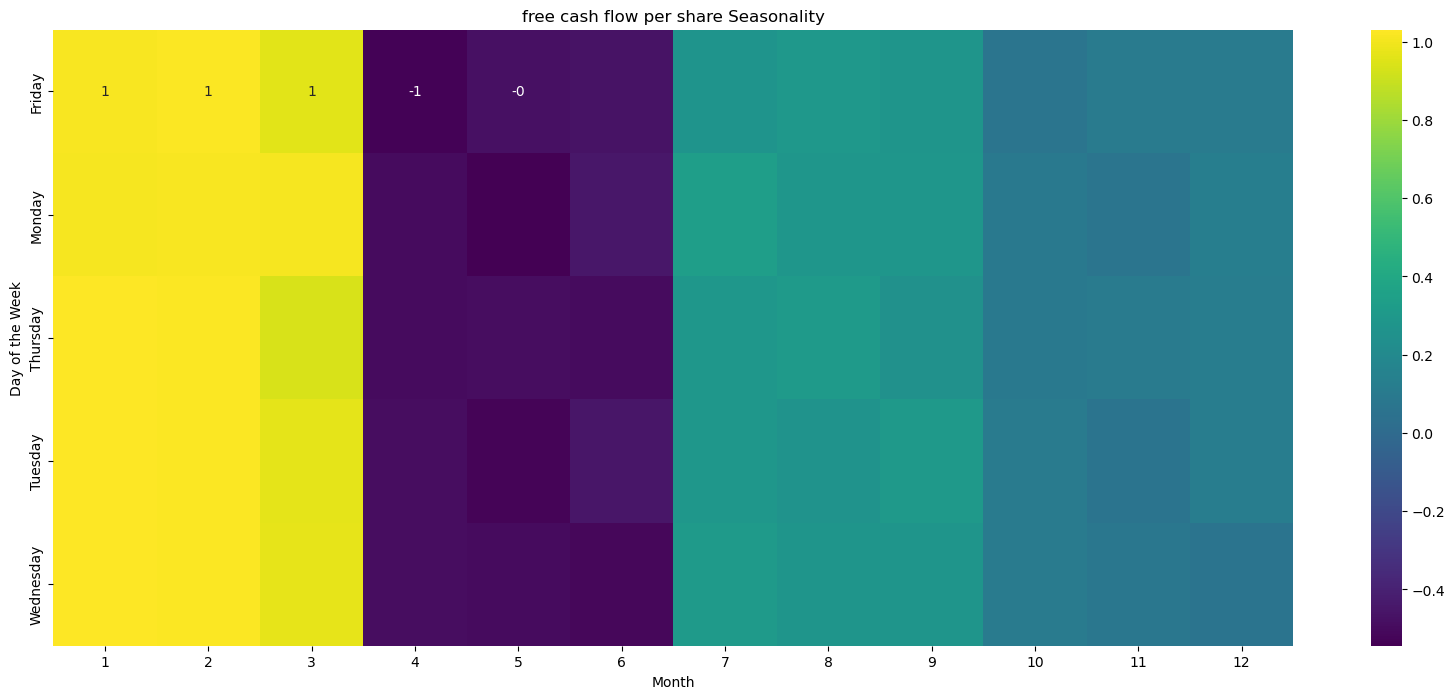

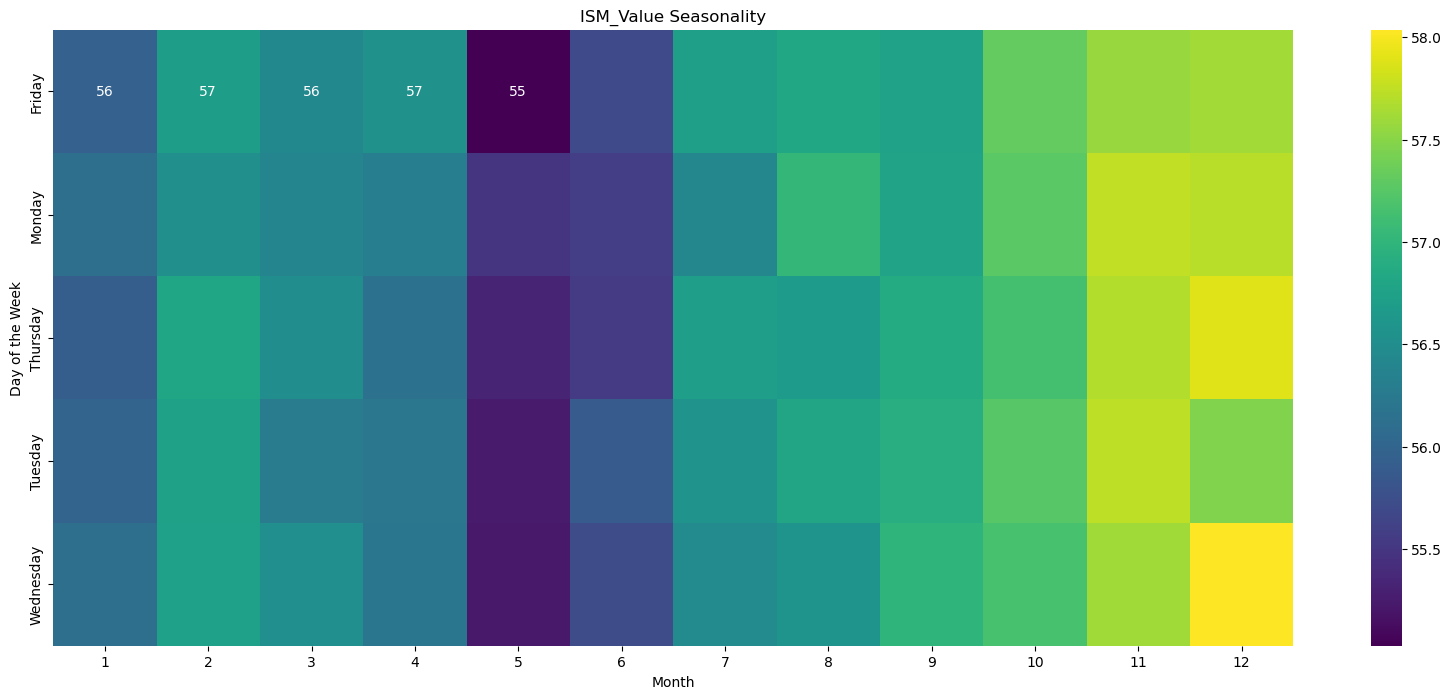

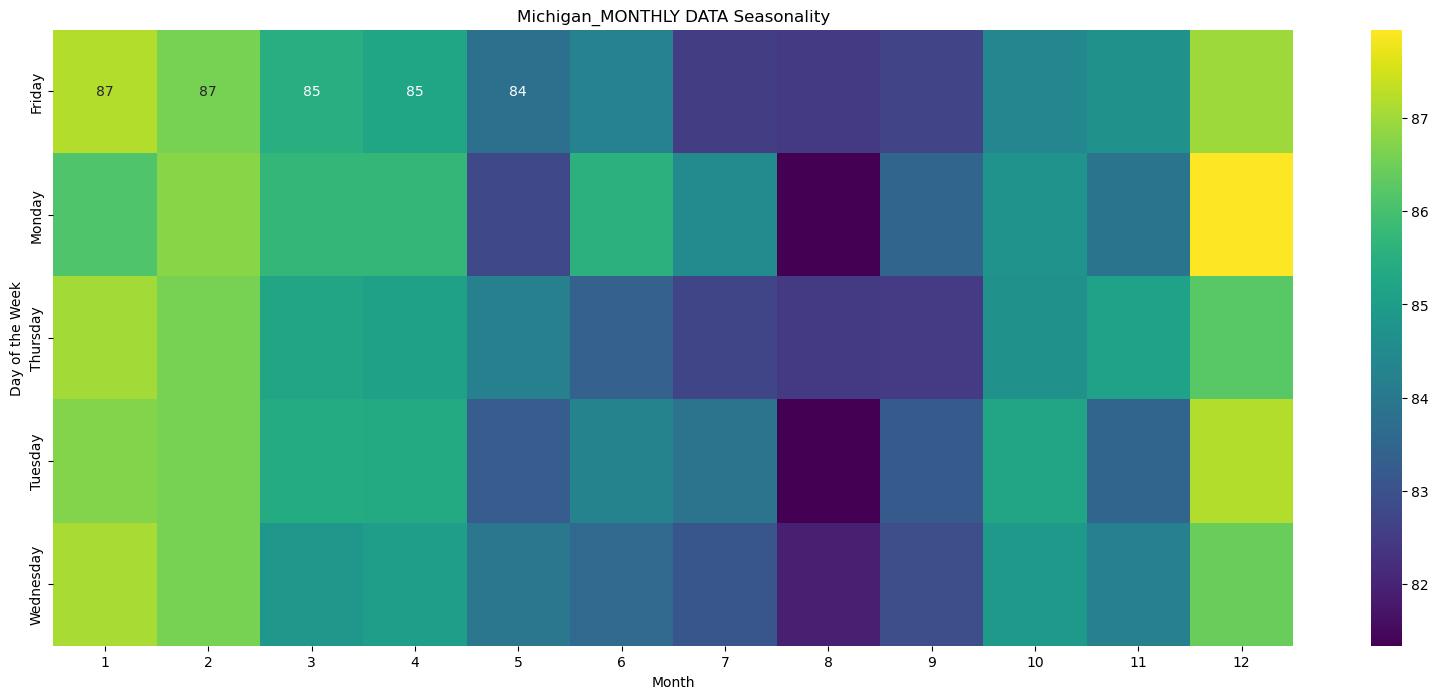

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import day_name

# 读取数据
file_path = '/Users/liangxinyue/Documents/小组项目/中后期小组项目/副本清除第一列.xlsx'  # 请替换为你的文件路径
df = pd.read_excel(file_path,header=1)

# 假设你有一个名为 'Date' 的列含有日期信息
df['Date'] = pd.to_datetime(df['AMZN_Date'])

# 添加月份和星期几的列
df['Month'] = df['AMZN_Date'].dt.month
df['DayOfWeek'] = df['AMZN_Date'].dt.day_name()

# 列出所有你感兴趣的指标
indicators = [
    'Revenue', 'AMZN_Volume', 'Nasdaq_Close', 'Nasdaq_Volume',
    'Net Income', 'Return on Equity', 'free cash flow per share',
    'ISM_Value','Michigan_MONTHLY DATA'
]

# 对于每个指标，计算每个月份和星期几的平均值，并绘制热图
for column in indicators:
    # 创建一个新的DataFrame，包含星期几、月份和当前指标的值
    temp_df = df[['DayOfWeek', 'Month', column]].copy()
    temp_df = temp_df.groupby(['DayOfWeek', 'Month']).mean().reset_index()
    # temp_df = temp_df.pivot('DayOfWeek', 'Month', column)

    temp_df = temp_df.pivot(index='DayOfWeek', columns='Month', values=column)


    # 绘制热图
    plt.figure(figsize=(20, 8))
    sns.heatmap(temp_df, cmap='viridis', annot=True, fmt=".0f")
    plt.title(f'{column} Seasonality')
    plt.xlabel('Month')
    plt.ylabel('Day of the Week')
    plt.show()
